<a href="https://colab.research.google.com/github/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive
%ls


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive
'Advantages and disadvantages of Support Vector Machines with respect to different types of applications (9).docx'
'Advantages and disadvantages of Support Vector Machines with respect to different types of applications (9).docx.gdoc'
 AllBlacks_18_08_2018/
 Amali/
'Amali CV'/
 Amali_Jayasundara_CV.pdf
 amazonreviews/
 Assignment3_12977435.pdf
 Beamafilm/
'Beamafilm Rebuild System Documentation.docx'
'Beamafilm Rebuild System Documentation.gdoc'
'Bea

In [0]:
def get_labels_and_texts(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    return np.array(labels), texts
train_labels, train_texts = get_labels_and_texts('./amazonreviews/train.ft.txt.bz2')
test_labels, test_texts = get_labels_and_texts('./amazonreviews/test.ft.txt.bz2')

In [0]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts
        
train_texts = normalize_texts(train_texts)
test_texts = normalize_texts(test_texts)

In [12]:
print(type(test_texts))
print(test_texts[1])

<class 'list'>
one of the best game music soundtracks   for a game i didn t really play  despite the fact that i have only played a small portion of the game  the music i heard  plus the connection to chrono trigger which was great as well  led me to purchase the soundtrack  and it remains one of my favorite albums  there is an incredible mix of fun  epic  and emotional songs  those sad and beautiful tracks i especially like  as there s not too many of those kinds of songs in my other video game soundtracks  i must admit that one of the songs  life a distant promise  has brought tears to my eyes on many occasions my one complaint about this soundtrack is that they use guitar fretting effects in many of the songs  which i find distracting  but even if those weren t included i would still consider the collection worth it 


In [13]:
!pip install -q vaderSentiment

     |████████████████████████████████| 133kB 5.3MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
scores = []

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    scores.append(score);
    

In [34]:
for index, item in zip(range(1000), test_texts):
    #print(index, item)
    sentiment_analyzer_scores(item)
   
print(scores)

[{'neg': 0.086, 'neu': 0.69, 'pos': 0.225, 'compound': 0.946}, {'neg': 0.043, 'neu': 0.791, 'pos': 0.165, 'compound': 0.9293}, {'neg': 0.058, 'neu': 0.779, 'pos': 0.162, 'compound': 0.6597}, {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9246}, {'neg': 0.087, 'neu': 0.739, 'pos': 0.173, 'compound': 0.7876}, {'neg': 0.129, 'neu': 0.761, 'pos': 0.11, 'compound': -0.3506}, {'neg': 0.148, 'neu': 0.642, 'pos': 0.21, 'compound': 0.6876}, {'neg': 0.148, 'neu': 0.686, 'pos': 0.167, 'compound': 0.2329}, {'neg': 0.153, 'neu': 0.766, 'pos': 0.081, 'compound': -0.6369}, {'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.9633}, {'neg': 0.086, 'neu': 0.69, 'pos': 0.225, 'compound': 0.946}, {'neg': 0.043, 'neu': 0.791, 'pos': 0.165, 'compound': 0.9293}, {'neg': 0.058, 'neu': 0.779, 'pos': 0.162, 'compound': 0.6597}, {'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9246}, {'neg': 0.087, 'neu': 0.739, 'pos': 0.173, 'compound': 0.7876}, {'neg': 0.129, 'neu': 0.761, 'pos': 0.11, 'compou

Plot Scores

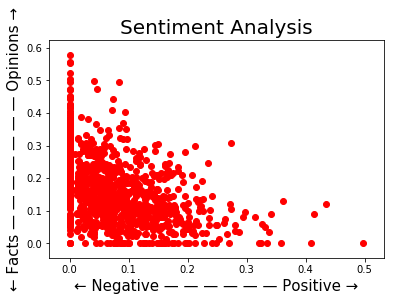

In [36]:

import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams[10,10] = [10, 8]
#for index, scores in enumerate(df.index):
# x = df.polarity.loc[Tweets]
# y = df.subjectivity.loc[Tweets]
# plt.scatter(x, y, color=’Red’)
x = []
y = []
for item in scores:
  #print(item['neg'])
  x.append(item['neg'])
  y.append(item['pos'])

plt.scatter(x, y, color='Red')

plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()